In [4]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import random
from sklearn.model_selection import GridSearchCV
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

Carga de datos

Un Conjutno de datos de juguete simple para visualizar algoritmos de agrupacion y clasificacion

In [6]:
from sklearn.datasets import make_moons
datos = make_moons(n_samples=300 , noise= 0.20 , random_state = 0)
df_x = [x[0] for x in datos [0]]
df_y = [x[1] for x in datos [0]]
df_group = datos [1]

Comprobamos si la clases son separables linealmente

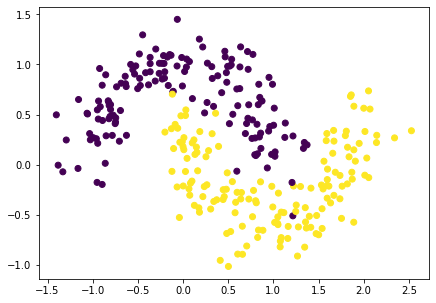

In [7]:
fig , ax = plt.subplots(figsize =(7,5))
ax.scatter(df_x,df_y,c = df_group)

Determinar el conjunto de modelizacion y el de validacion
*train 80% del conjunto de datos
*test 20% del conjunto de datos

In [8]:
df_pd=pd.DataFrame(list(zip(df_x , df_y , df_group)), columns = ["x", "y", "group"])
X_train,X_test,y_train,y_test = train_test_split( df_pd[["x", "y"]],
                                                 df_pd["group"],
                                                 test_size = 0.2,
                                                 stratify = df_pd["group"]
                                                )

In [12]:
x_min, x_max = df_pd["x"].min()-0.1, df_pd["x"].max()+0.1
y_min, y_max = df_pd["y"].min()-0.1, df_pd["y"].max()+0.1

def plot_decision_boundary (x,y,labels,model,
                            x_min=x_min,
                            x_max=x_max,
                            y_min=y_min,
                            y_max=y_max,
                            grid_step = 0.02
                           ):

    xx,yy = np.mesgrid(np.arange(x_min,x_max,grid_step),
                       np.arange(y_min,y_max,grid_step))
    # predecimos el classifier con los valores de la meshgrid
    z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    # hacemos reshape para tener el formato correcto.
    Z = Z.reshape(xx.shape)
    
    #Seleccionamos una paleta de color.
    arr = plt.cm.coolwarm(np.arange(plt.cm.coolwarm.N))
    arr_hsv = mpl.colors.rgb_to_hsv(arr[:,0:3])
    arr_hsv[:,2] = arr_hsv[:,2] * 1.5
    arr_hsv[:,1] = arr_hsv[:,1] * .5
    arr_hsv = np.clip(arr_hsv,0,1)
    arr[:,0:3] = mpl.colors.hsv_to_rgb(arr_hsv)
    my_cmap = ListedColormap(arr)
    
    #Hacemos el grafico de las fronteras de decision
    fig, ax = plt.subplots (figsize = (7,7))
    plt.pcolormesh(xx,yy,Z , cmap=my_cmap)
    
    #Añadimos los puntos
    ax.scatter(x,y,c = labels, cmap = "coolwarm")
    ax.set_xlim(xx.min() , xx.max())
    ax.grid(False)

Parametrizacion del algoritmo
usamos el algoritmo de maquinas de vectores de SKlearn

In [13]:
clf = svm.SVC(C=1 , gamma = 10 , probability = True)

In [14]:
clf

SVC(C=1, gamma=10, probability=True)

Entrenamiento del clasificador

In [19]:
clf.fit(X_train, y_train)
#plot_decision_boundary(X_test["x"] , X_test["y"] , y_test , clf)

SVC(C=1, gamma=10, probability=True)

Prediccion y evaluacion del modelo

In [20]:
from sklearn.metrics import confusion_matrix
pred = clf.predict(X_test)
accuracy = np.true_divide(np.sum ( pred == y_test) , pred.shape[0])*100
cnf_matrix = confusion_matrix(y_test,pred)

print(accuracy)
print(cnf_matrix)

100.0
[[30  0]
 [ 0 30]]
